In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
from matplotlib import pyplot as plt
import random 

In [ ]:
data=[None]*10
for i in range(10):
  location='/content/drive/MyDrive/sem5MlProject/dataset/PreProcessedData/augumentationALL_Mohnish1/fold'+str(i+1)+'.npy'
  x=np.load(location,mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
  random_indices =np.random.choice(x.shape[0], size=1000, replace=False)
  print(x.shape)
  data[i]=x[random_indices]
  

(6111, 2)
(6216, 2)
(6475, 2)
(6930, 2)
(6552, 2)
(5761, 2)
(5866, 2)
(5642, 2)
(5712, 2)
(5859, 2)


In [ ]:
X_Train=[None]*10
Y_Train=[None]*10
X_Test=[None]*10
Y_Test=[None]*10
X_Valid=[None]*10
Y_Valid=[None]*10


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from keras.utils import np_utils
model=[None]*10
history=[None]*10
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/drive/MyDrive/sem5MlProject/best_model_1_may.hdf5", monitor='loss', verbose=1,save_best_only=True, mode='auto', save_freq=20)

In [ ]:
 for i in range(2,10):
   X_Train[i]=data[(i+4)%10][:,0:1]
   Y_Train[i]=data[(i+4)%10][:,1:2]
   X_Test[i]=data[i][:,0:1]
   Y_Test[i]=data[i][:,1:2]
   for j in range(i+1,(i+2)):
      Y_Test[i]=np.concatenate((Y_Test[i],data[j%10][:,1:2]), axis=0)
      X_Test[i]=np.concatenate((X_Test[i],data[j%10][:,0:1]), axis=0)
   for j in range(i+5,i+10):
      X_Train[i]=np.concatenate((X_Train[i],data[j%10][:,0:1]), axis=0)
      Y_Train[i]=np.concatenate((Y_Train[i],data[j%10][:,1:2]), axis=0)
    #print(i+1,"th model",'')
   X_Train[i]=np.array(X_Train[i].tolist()).reshape(X_Train[i].shape[0],128,128,1)
   Y_Train[i]=np.array(Y_Train[i].tolist())
   X_Test[i]=np.array(X_Test[i].tolist()).reshape(X_Test[i].shape[0],128,128,1)
   Y_Test[i]=np.array(Y_Test[i].tolist())
   Y_Train[i] = np_utils.to_categorical(lb.fit_transform(Y_Train[i]))
   Y_Test[i] = np_utils.to_categorical(lb.fit_transform(Y_Test[i]))
  #print(X_Traini.shape,Y_Traini.shape)
   model[i] = Sequential()
   model[i].add(Conv2D(24, (5, 5), input_shape=(128, 128, 1)))
   model[i].add(MaxPooling2D((4, 2), (4, 2)))
   model[i].add(Activation('relu'))
          
   model[i].add(Conv2D(48, (5, 5)))
   model[i].add(MaxPooling2D((4, 2), (4, 2)))
   model[i].add(Activation('relu'))
          
   model[i].add(Conv2D(48, (5, 5)))
   model[i].add(Activation('relu'))
   model[i].add(Flatten())
   model[i].add(Dropout(0.5))
   model[i].add(Dense(64, kernel_regularizer=regularizers.l2(0.001)))
   model[i].add(Activation('relu'))

   model[i].add(Dropout(0.5))
   model[i].add(Dense(10, activation='softmax',bias_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.001),kernel_regularizer=regularizers.l2(0.001)))
   model[i].load_weights('/content/drive/MyDrive/sem5MlProject/best_model_17_march.hdf5')
   model[i].compile(optimizers.Adam(lr=0.001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
   model[i].summary()
   k=model[i].fit(X_Train[i], Y_Train[i],callbacks=[checkpoint], batch_size=500, epochs=100, validation_data = (X_Test[i],Y_Test[i]))
   history[i]=k

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 62, 24)        0         
_________________________________________________________________
activation (Activation)      (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 25, 48)         5

In [ ]:
#    X_Valid[i]=np.concatenate((X_Valid[i],data[j%3][:,0:1]), axis=0)

### Plotting Distribution of Data Set

In [ ]:
#%matplotlib inline
#plt.hist(Y, bins = 20);
#print(np.unique(Y))

NameError: ignored

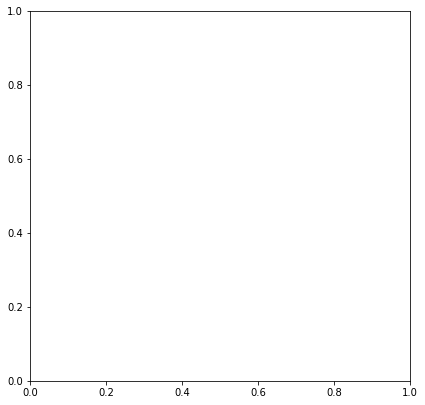

In [ ]:
from matplotlib import pyplot as plt
net = -1
name_title = ['Loss','Accuracy']
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
    plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()